# Principal Component Analysis

PCA (https://en.wikipedia.org/wiki/Principal_component_analysis) is commonly used to inspect transcriptomic dataset and detect the presence of batch effects and other technical artifacts.

**COLOMBOS’** preprocessing does not perform an explicit transformation to correct for batch effects. Instead, it defines contrasts within what we consider a *batch*, i.e. between samples coming from the same platform and experiment (usually a group of samples from the same lab, belonging together and done in the context of a single study or publication). These contrast logratios retain the relevant biological information, while *dividing away* batch effects so that the resulting fold-changes can be compared across experiments.

**Ecomics** groups samples into batches by what could be described as *platform manufacturer* (see column ‘Platform’ in the file ncomms13090-s2.xlsx and figure legend). This choice, however do not take into consideration that a single manufacturer can produce different platforms.

A PCA performed on the COLOMBOS dataset shows no clear separation of platforms supporting an adequate removal of batch effects. On the other hand, PCA performed on Ecomics data, clearly shows that for the same *platform manufacturer*, samples separate. 

### COLOMBOS PCA

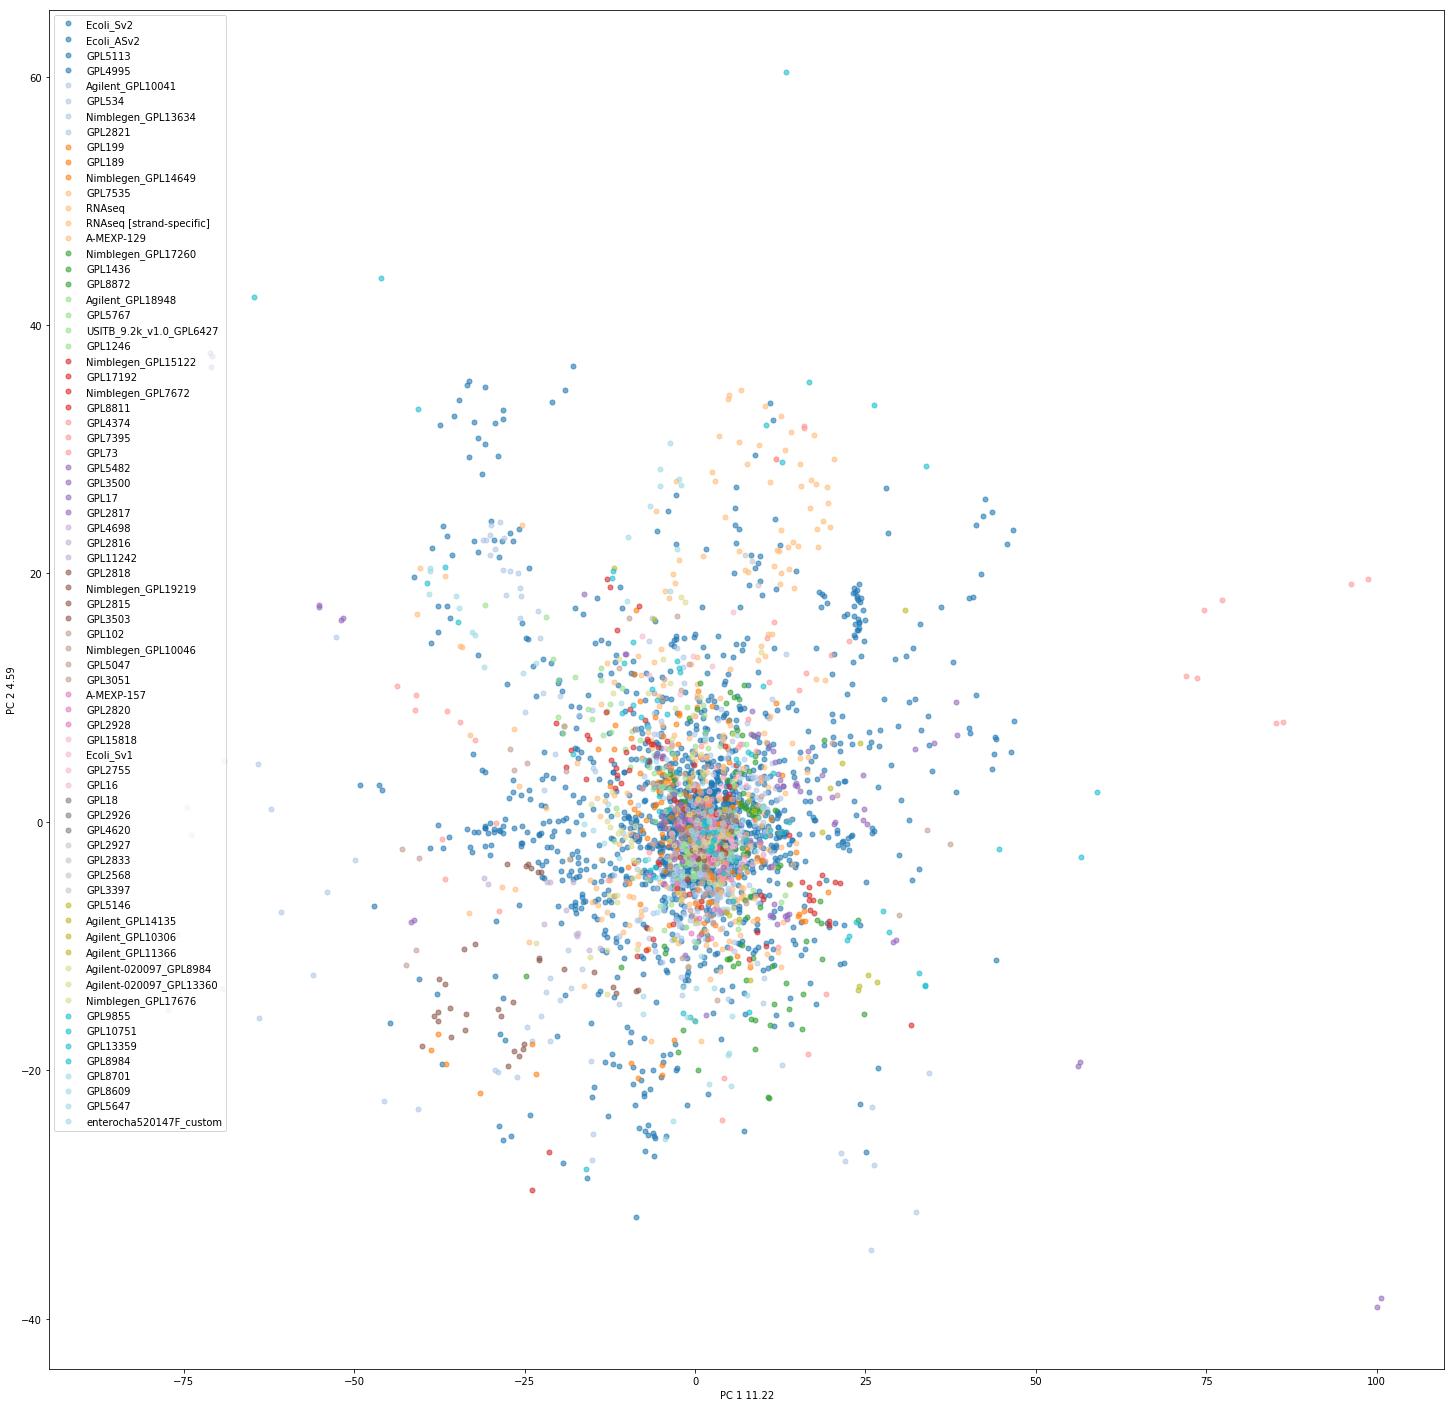

In [5]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn import decomposition

%matplotlib inline

plt.figure(figsize=(25,25))

### Read COLOMBOS contrast data
colombos_ctr_data = pd.read_table('colombos_ecoli_exprdata_20151029.txt', sep='\t', nrows=6)
colombos_ctr_data = colombos_ctr_data[colombos_ctr_data.columns[2:]]
colombos_ctr_data = colombos_ctr_data.set_index(colombos_ctr_data.columns[0])
colombos_ctr_data.index = list(colombos_ctr_data.index[:-1]) + ['Contrast ID']

### Read COLOMBOS gene data
colombos_gene_data = pd.read_table('colombos_ecoli_exprdata_20151029.txt', sep='\t', skiprows=6)
colombos_gene_data = colombos_gene_data[colombos_gene_data.columns[:3]]
colombos_gene_data.columns = list(colombos_gene_data.columns[:2]) + ['Gene ID']
colombos_gene_data = colombos_gene_data.set_index('Gene ID')
colombos_gene_data['LocusTag'] = ['m.' + lc for lc in colombos_gene_data['LocusTag'].tolist()]

### Read COLOMBOS expression data
colombos_exp_data = pd.read_table('colombos_ecoli_exprdata_20151029.txt', sep='\t', skiprows=6)
colombos_exp_data = colombos_exp_data[colombos_exp_data.columns[2:]]
colombos_exp_data = colombos_exp_data.rename(columns = {'Geneid/Contrast_id':'Gene ID'})
colombos_exp_data = colombos_exp_data.set_index('Gene ID')
colombos_exp_data = colombos_exp_data.T

colombos_exp_data.insert(0, 'Platform', colombos_ctr_data.T[['Platform', 'Contrast ID']].set_index('Contrast ID'))
colombos_exp_data = colombos_exp_data.sort_values('Platform')
data_values = colombos_exp_data[colombos_exp_data.columns[2:]]
data_values = np.nan_to_num(data_values)
platforms = colombos_exp_data.groupby('Platform').count().sort_values(colombos_exp_data.columns[1], ascending=False).index.tolist()

pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(data_values)

norm = plt.Normalize()
colors = plt.get_cmap('tab20')(norm(range(len(platforms))))

for i, platform in enumerate(platforms):
    idx = colombos_exp_data.reset_index().index[(colombos_exp_data["Platform"] == platform)].tolist()
    st, en = idx[0], idx[-1] + 1
    plt.plot(X[st:en,0], X[st:en,1], 'o', markersize=5, alpha=0.6, label=platform, color=colors[i])
    
plt.xlabel('PC 1 ' + str(round(pca.explained_variance_ratio_[0] * 100, 2)))
plt.ylabel('PC 2 ' + str(round(pca.explained_variance_ratio_[1] * 100, 2)))
legend = plt.legend(loc='upper left', frameon=True)
plt.show()

### Ecomics - PCA

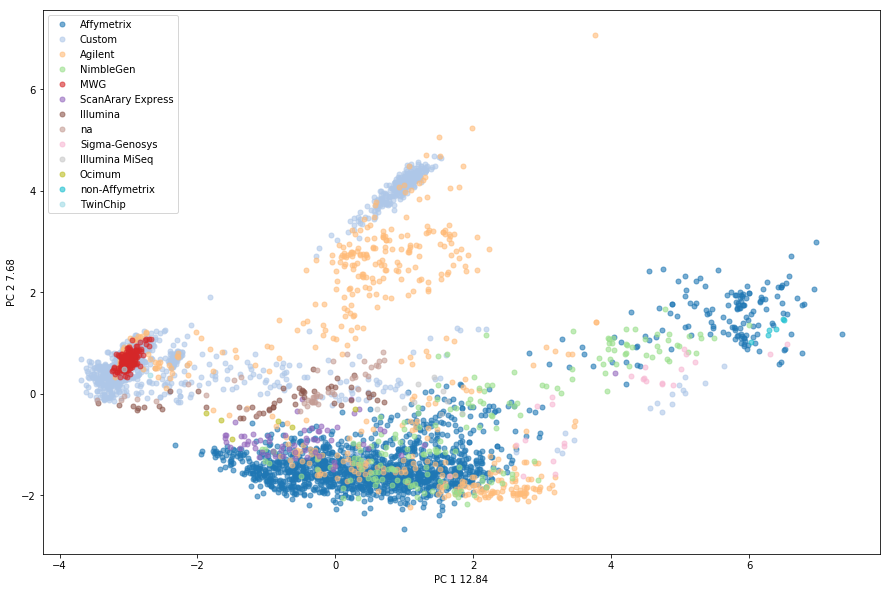

In [4]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn import decomposition

%matplotlib inline

plt.figure(figsize=(15,10))

ecomics_info = pd.read_csv('ncomms13090-s2_trans.csv', index_col=0)
ecomics_v8 = pd.read_csv('ecomics.transcriptome.no_avg.v8.txt', sep='\t', index_col=0)
del ecomics_v8['Cond']
ecomics_v8.insert(0, 'Platform', ecomics_info['Platform'])
ecomics_v8 = ecomics_v8.sort_values('Platform')
data_values = ecomics_v8[ecomics_v8.columns[2:]]
platforms = ecomics_v8.groupby('Platform').count().sort_values(ecomics_v8.columns[1], ascending=False).index.tolist()

pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(data_values)

norm = plt.Normalize()
colors = plt.get_cmap('tab20')(norm(range(len(platforms))))

for i, platform in enumerate(platforms):
    idx = ecomics_v8.reset_index().index[(ecomics_v8["Platform"] == platform)].tolist()
    st, en = idx[0], idx[-1] + 1
    plt.plot(X[st:en,0], X[st:en,1], 'o', markersize=5, alpha=0.6, label=platform, color=colors[i])
    
plt.xlabel('PC 1 ' + str(round(pca.explained_variance_ratio_[0] * 100, 2)))
plt.ylabel('PC 2 ' + str(round(pca.explained_variance_ratio_[1] * 100, 2)))
legend = plt.legend(loc='upper left', frameon=True)
plt.show()